In [82]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from textblob import TextBlob

In [83]:
results = pd.read_csv("final_result.csv")

In [84]:
results

,Video ID,Sentiment,Rating,Revenue
0,l9laReRAYFk,0.008875,6.7,1.256972e+08
1,KmrU6gMc1Lc,0.008915,4.3,NaN
2,-egQ79OrYCs,0.008745,4.1,3.197139e+08
3,AST2-4db4ic,0.009075,8.0,2.031276e+08
4,LUG2U-IxPx0,0.008663,6.3,1.575636e+08
5,aieQrj9Yy8s,0.009048,6.7,1.000140e+08
6,nTTMeo5TwkA,-0.008428,3.7,NaN
7,a6O30nJ02PU,0.008548,4.6,4.041978e+07
8,5PSNL1qE6VY,0.009976,7.8,2.790429e+09
9,-_DJEzZk2pc,0.008663,8.6,1.074151e+09


## 1. Displaying the results

Text(0, 0.5, 'Sentiment')

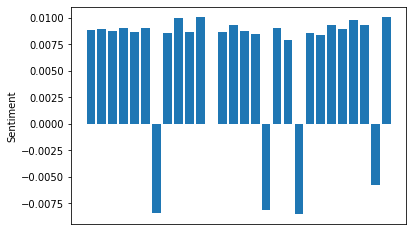

In [85]:
plt.bar(results['Video ID'], results['Sentiment'])
plt.xticks([])
plt.ylabel('Sentiment')

(0.007, 0.0105)

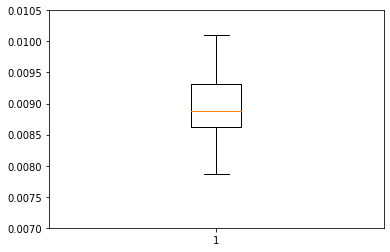

In [86]:
plt.boxplot(results[results.Sentiment > 0]['Sentiment'])
plt.ylim(0.0070, 0.0105)

## 2. Positive vs. Negative reviews

([<matplotlib.patches.Wedge at 0x134678390>,
 [Text(-0.9910657674599292, 0.4772720865178076, 'Positive'),
  Text(0.9910657898026469, -0.47727204012267027, 'Negative')],
 [Text(-0.5405813277054159, 0.2603302290097132, '85.7%'),
  Text(0.5405813398923528, -0.2603302037032747, '14.3%')])

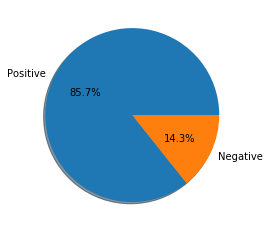

In [89]:
results1 = results[results.Sentiment > 0]
results2 = results[results.Sentiment < 0]
results_list = [len(results1), len(results2)]
results_list

plt.pie(results_list, autopct='%1.1f%%', labels=['Positive', 'Negative'], shadow=True)

## 3. Correlation Graph with a Line of Best Fit (answering reseach question)

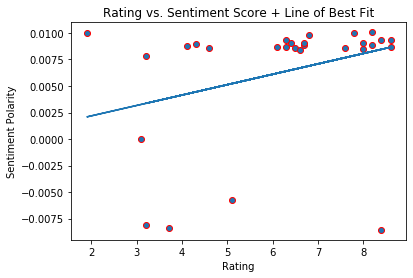

In [111]:
#We use a linear regression model to plot a line of best fit onto our results.

m, b = np.polyfit(results['Rating'], results['Sentiment'], 1)

#plt.plot(results['Rating'], results['Sentiment'], 'o')
plt.scatter(results['Rating'], results['Sentiment'], edgecolors='r')
plt.ylabel('Sentiment Polarity')
plt.xlabel('Rating')
plt.title('Rating vs. Sentiment Score + Line of Best Fit')
plt.ylim([-0.0095, 0.0110])
plt.plot(results['Rating'], m*results['Rating'] + b)

#As we can see, we have a positive correlation between movie rating and sentiment of comments.

## 4. Sentiment of a single movie

In [32]:
df1 = pd.read_csv("comments/Parasite.csv")

final_list = []
for comment in df1['Comment']:
    text = TextBlob(comment)
    result = text.sentiment.polarity
    final_list.append(result)
df1['Sentiment'] = final_list

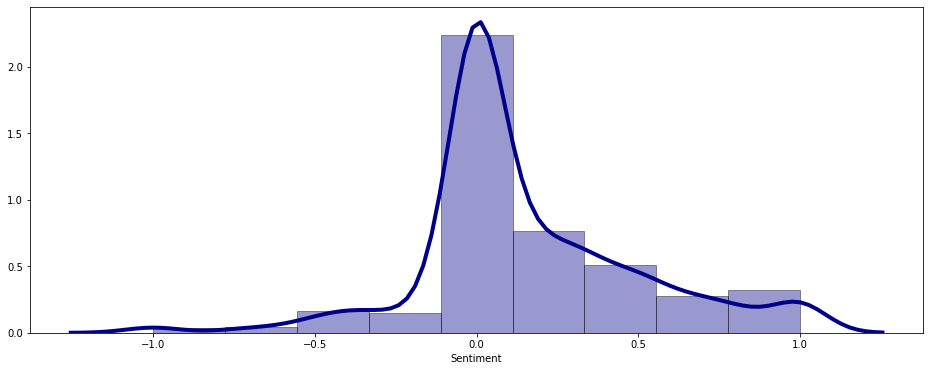

In [20]:
# Density Plot and Histogram
plt.figure(figsize=(16, 6))
sns.distplot(df1['Sentiment'], hist=True, kde=True, 
             bins=int(180/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## 5. Correlation Graph (Revenue vs. Sentiment)

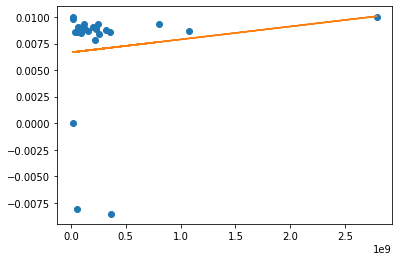

In [69]:
results3 = results.dropna()

m, b = np.polyfit(results3['Revenue'], results3['Sentiment'], 1)

plt.plot(results3['Revenue'], results3['Sentiment'], 'o')
plt.plot(results3['Revenue'], m*results3['Revenue'] + b)

#Weak positive correlation